# Optimization

## Task 1a: Code an optimizer to solve the Eggholder and Levi13 functions

* The goal of this project is to optmize the Eggholder and Levi13 functions.
* Feel free to implement any of the algorithms we mentioned in the class (# NOTE LS: two conceptual different algorithms, simulated analysinc and genetic algorithm)
* Implement two of them and compare the results
* If two algorithms found the best solution, the better one is the one with fewer calls to the objective function (# NOTE LS: costs time to calling objective / loss function -> need to consider it)

Imports

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random
import math
import time

**Let's define our objective functions**

In [67]:
def objective_eggholder(x1,x2):
  ## Find the global minimum [f(512, 404.2319) = -959.6407]
  a=np.sqrt(np.fabs(x2+x1/2+47))
  b=np.sqrt(np.fabs(x1-(x2+47)))
  c=-(x2+47)*np.sin(a)-x1*np.sin(b)
  return c

def objective_levi_n13(x1, x2):
  ## Find the global minimum [f(1, 1) = 0]
  c = (np.sin(3*np.pi*x1) ** 2) + ((x1-1)**2) * (1+np.sin(3*np.pi*x2) ** 2) + \
    ((x2-1)**2) * (1+np.sin(2*np.pi*x2) ** 2)
  return c

def objective_wrapper(solution):
  return objective_levi_n13(solution[0], solution[1])

print(objective_wrapper(np.array([105.5, 0.4])))
print(np.exp(-1.41))

14694.587960529503
0.2441432831534371


Plotting the objective function

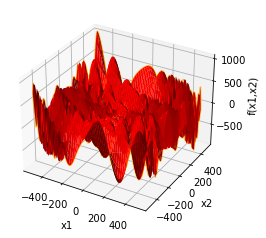

In [68]:
def plot_objective(f):
  fig=plt.figure()
  ax=plt.axes(projection='3d')
  x1=np.linspace(-512,512,100)
  x2=np.linspace(-512,512,100)
  X1,X2=np.meshgrid(x1,x2)
  ax.plot_surface(X1,X2,f(X1,X2),color='red')
  ax.plot_wireframe(X1,X2,f(X1,X2),ccount=15,rcount=15,color='orange',alpha=0.8)
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('f(x1,x2)')

plot_objective(objective_eggholder)

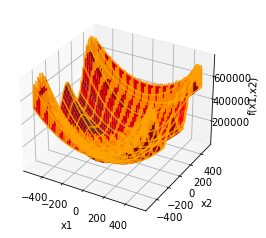

In [69]:
plot_objective(objective_levi_n13)

The main loop of the algorithm. Record the best solutions in each loop and print it out to see the progress

In [70]:
# Create 1. Algorihtm: Hill climbing
def hill_climbing_optimization(objective_function, bounds, max_iterations=100000, step_size=0.01, initial_point = "NA"):
    """
    Perform optimization using the Hill Climbing algorithm.

    Parameters:
    - objective_function (function): The objective function to be optimized.
    - bounds (list of tuples): The bounds for each variable.
    - max_iterations (int): The maximum number of iterations for the algorithm.
    - step_size (float): The step size for generating candidate solutions.
    - initial_point (list): The intial starting point, optional input. Defaul is "NA" which means a random point is generated.

    Returns:
    - solution (tuple): The best solution found.
    - solution_value (float): The value of the objective function at the best solution.
    - cost_progress (list): List of objective function values at each iteration.
    - initial_point (tuple): The initial point where the optimization started.
    """

    # Define initial_point by checking if there is an input
    if initial_point == "NA": 
        solution = [random.uniform(bounds[i][0], bounds[i][1]) for i in range(len(bounds))] # Initialize with a random initial point within the given bounds
        
    else:
        solution = initial_point

    # evaluate the initial point
    solution_value = objective_function(*solution)
    
    initial_point = (solution, solution_value)

    # store the cost at each iteration to be able to plot the progress
    cost_progress = []

    # Run the Hill Climbing algorithm
    for i in range(max_iterations):
        # take a step
        candidate = [
            solution[i] + random.uniform(-1, 1) * step_size
            for i in range(len(solution))
        ]

        # ensure the candidate point lies within the lower and upper bounds
        candidate = [
            min(max(candidate[i], bounds[i][0]), bounds[i][1])
            for i in range(len(solution))
        ]

        # evaluate candidate point
        canditate_value = objective_function(*candidate)

        # check if the cost of the candidate point is lower than the initial point
        # if it is lower, take this point instead as the new point
        if canditate_value < solution_value:
            # store the new point
            solution, solution_value = candidate, canditate_value

        # Record the best solution in each loop (print it & append to the list)
        # print(solution_value) # not printed due to long results -> but returned in cost_progress
        cost_progress.append(solution_value)

    print("Best solution value:", solution_value) # print overall best found solution

    return solution, solution_value, cost_progress, initial_point

In [71]:
# Create 2. Algorihtm: Simulated Annealing

def simulated_annealing_optimization(objective_function, bounds, temp, max_iterations=100000, step_size=0.1, initial_point = "NA"):
    """
    Perform optimization using the Simulated Annealing algorithm.

    Parameters:
    - objective_function (function): The objective function to be optimized.
    - bounds (list of lists): The bounds for each dimension of the search space.
    - temp (float): Initial temperature for the Simulated Annealing algorithm.
    - max_iterations (int, optional): Maximum number of iterations. Default is 100000.
    - step_size (float, optional): Step size for generating candidate solutions. Default is 0.1.
    - initial_point (list): The intial starting point, optional input. Defaul is "NA" which means a random point is generated.

    Returns:
    - solution (list): The best solution found.
    - solution_value (float): The value of the objective function at the best solution.
    - cost_progress (list): List of objective function values at each iteration.
    - initial_point (tuple): The initial point where the optimization started.

    """

    # Define initial_point by checking if there is an input
    if initial_point == "NA": 
         solution_current = [random.uniform(bounds[i][0], bounds[i][1]) for i in range(len(bounds))] # Initialize with a random initial point within the given bounds
        
    else:
        solution_current = initial_point

    solution = solution_current

    # Calculate the objective function
    solution_current_cost = objective_function(*solution_current)
    solution_value = solution_current_cost
    
    initial_point = (solution_current, solution_current_cost)

    # store the cost at each iteration to be able to plot the progress
    cost_progress = []

    for i in range(max_iterations):
        # Take a step
        candidate = [0] * len(bounds)
        for j in range(len(bounds)):
            # Escaping local minima
            candidate[j] = solution_current[j] + step_size * random.uniform(-1,1)
            candidate[j] = max(min(candidate[j], bounds[j][1]), bounds[j][0])

        candidate_cost = objective_function(*candidate)

        # Checking: is candidate cost better than the current cost?
        if candidate_cost < solution_current_cost:
            solution_current, solution_current_cost = candidate, candidate_cost
            if candidate_cost < solution_value:
                solution, solution_value = candidate, candidate_cost
        else:
            # Calculate acceptance probability of worse solution
            diff = candidate_cost - solution_current_cost
            t = temp / float(i + 1)
            metropolis = math.exp(-diff / t)
            # Accept worse solution with a certain probability
            if random.random() < metropolis:
                solution_current, solution_current_cost = candidate, candidate_cost

        # Store the cost
        # print(solution_current_cost) # not printed due to long results -> but returned in cost_progress
        cost_progress.append(solution_current_cost)
        
    print("Best solution value:", solution_value)

    return solution, solution_value, cost_progress, initial_point

In [109]:
# Define an intial_point that is taken for all optimizers to compare them based on the same starting point
initial_point = [random.uniform(bounds[i][0], bounds[i][1]) for i in range(len(bounds))] 

In [110]:
# Call the optimizers: 1. Hill Climbing on Eggholder Function

# Define hyperparameters
bounds = [[-512, 512], [-512, 512]] # bounds as in plot above
max_iterations= 500000

start_time = time.time()

egg_best_solution_hill, egg_best_value_hill, egg_cost_progress_hill, egg_initial_point_hill = hill_climbing_optimization(
    objective_eggholder, bounds, max_iterations, initial_point = initial_point)

end_time = time.time()
execution_time_egg_hill = end_time - start_time

print("The best solution found:", egg_best_solution_hill)
print("The initial point where the optimization started:", egg_initial_point_hill)
print("Execution time:", execution_time_egg_hill, "seconds")
# print("List of objective function values at each iteration:", egg_cost_progress_hill)

Best solution value: -206.69740638837365
The best solution found: [61.29047976842834, -198.76831966388156]
The initial point where the optimization started: ([10.321994678301394, -175.33957491121907], -120.32042369530201)
Execution time: 2.6456429958343506 seconds


In [111]:
# Call the optimizers: 1. Sim. An. on Eggholder Function
# Define hyperparameters
temp = 100
step_size = 0.1

start_time = time.time()

egg_best_solution_siman, egg_best_value_siman, egg_cost_progress_siman, egg_initial_point_siman = simulated_annealing_optimization(
    objective_eggholder,bounds, temp, max_iterations,step_size = 100, initial_point = initial_point)

end_time = time.time()
execution_time_egg_siman = end_time - start_time

print("The best solution found:", egg_best_solution_siman)
print("The initial point where the optimization started:", egg_initial_point_siman)
print("Execution time:", execution_time_egg_siman, "seconds")
# print("List of objective function values at each iteration:", egg_cost_progress_siman)

Best solution value: -629.621056226869
The best solution found: [418.7656703936969, 171.03283288642035]
The initial point where the optimization started: ([10.321994678301394, -175.33957491121907], -120.32042369530201)
Execution time: 2.6883277893066406 seconds


In [112]:
# Call the optimizers: 1. Hill Climbing on Levin13 function
# Use same hyperparameters as above

start_time = time.time()

levin13_best_solution_hill, levin13_best_value_hill, levin13_cost_progress_hill, levin13_initial_point_hill = hill_climbing_optimization(
    objective_levi_n13, bounds, max_iterations, initial_point = initial_point)

end_time = time.time()
execution_time_levin13_hill = end_time - start_time

print("The best solution found:", levin13_best_solution_hill)
print("The initial point where the optimization started:", levin13_initial_point_hill)
print("Execution time:", execution_time_levin13_hill, "seconds")
# print("List of objective function values at each iteration:", levin13_cost_progress_hill)

Best solution value: 31162.84561437568
The best solution found: [3.2649532509951067, -175.49985629219566]
The initial point where the optimization started: ([10.321994678301394, -175.33957491121907], 53425.67528465884)
Execution time: 2.115312099456787 seconds


In [113]:
# Call the optimizers: 1. Sim. An. on Levin13 Function
# Same hyperparameters as above
temp = 1000

start_time = time.time()

levin13_best_solution_siman, levin13_best_value_siman, levin13_cost_progress_siman, levin13_initial_point_siman = simulated_annealing_optimization(
    objective_levi_n13, bounds, temp, max_iterations, initial_point = initial_point)

end_time = time.time()
execution_time_levin13_siman = end_time - start_time

print("The best solution found:", levin13_best_solution_siman)
print("The initial point where the optimization started:", levin13_initial_point_siman)
print("Execution time:", execution_time_levin13_siman, "seconds")
# print("List of objective function values at each iteration:", levin13_cost_progress_siman)

Best solution value: 31157.652356378545
The best solution found: [2.6274525203546535, -175.4998578469572]
The initial point where the optimization started: ([10.321994678301394, -175.33957491121907], 53425.67528465884)
Execution time: 2.203104019165039 seconds


Show the solutions ploted on the function to check if the solution makes sense

In [2]:
# Create different functions that plot the results
def plot_cost_progress(cost_progress, algorithm_name, function_name):
    """
    Plot the cost (objective function value) over epochs for a given optimization algorithm and function.

    Parameters:
    - cost_progress (list): List of objective function values at each iteration.
    - algorithm_name (str): Name of the optimization algorithm.
    - function_name (str): Name of the objective function.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    plt.plot(cost_progress, label=algorithm_name)
    plt.xlabel('Epochs')
    plt.ylabel('Objective Function Value (Cost)')
    plt.title(f'Cost over Epochs - {algorithm_name} on {function_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    
def plot_3d_surface(function, solution, solution_value, initial_point):
    """
    Plot the 3D surface of the objective function along with the solution and initial point.

    Parameters:
    - function (function): The objective function to be plotted.
    - solution (tuple): The solution point found by the optimization.
    - solution_value (float): The value of the objective function at the solution point.
    - initial_point (tuple): The initial point where the optimization started.

    Returns:
    - None
    """

    solution = [solution, solution_value]

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')  # 3D plot

    x1 = np.linspace(-512, 512, 100)
    x2 = np.linspace(-512, 512, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = function(X1, X2)

    # 3D plot
    ax.plot_surface(X1, X2, Z, color='red', alpha=0.2)
    ax.plot_wireframe(X1, X2, Z, ccount=15, rcount=15, color='orange', alpha=0.3)
    ax.scatter(solution[0][0], solution[0][1], solution[1], color='blue', s=100)  # solution
    ax.scatter(initial_point[0][0], initial_point[0][1], initial_point[1], color='green', s=100)  # initial point
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')
    plt.title('3D Surface Plot')
    plt.show()

def plot_2d_x1(function, solution, solution_value, initial_point):
    """
    Plot the objective function along the x1 axis with the solution point.

    Parameters:
    - function (function): The objective function to be plotted.
    - solution (tuple): The solution point found by the optimization.
    - solution_value (float): The value of the objective function at the solution point.

    Returns:
    - None
    """
    
    solution = [solution, solution_value]

    fig = plt.figure(figsize=(10, 6))
    x1 = np.linspace(-512, 512, 100)
    plt.plot(x1, function(x1, solution[0][1]), color='blue', label='f(x1, x2*)')
    plt.scatter(solution[0][0], solution[1], color='red', label='Solution')
    plt.scatter(initial_point[0][0], initial_point[1], color='green', label='Initial Point')
    plt.xlabel('x1')
    plt.ylabel('f(x1, x2*)')
    plt.legend()
    plt.title('2D Plot along x1')
    plt.grid(True)
    plt.show()

    
def plot_2d_x2(function, solution, solution_value, initial_point):
    """
    Plot the objective function along the x2 axis with the solution point.

    Parameters:
    - function (function): The objective function to be plotted.
    - solution (tuple): The solution point found by the optimization.
    - solution_value (float): The value of the objective function at the solution point.

    Returns:
    - None
    """
    
    solution = [solution, solution_value]

    fig = plt.figure(figsize=(10, 6))
    x2 = np.linspace(-512, 512, 100)
    plt.plot(x2, function(solution[0][0], x2), color='blue', label='f(x1*, x2)')
    plt.scatter(solution[0][1], solution[1], color='red', label='Solution')
    plt.scatter(initial_point[0][1], initial_point[1], color='green', label='Initial Point')
    plt.xlabel('x2')
    plt.ylabel('f(x1*, x2)')
    plt.legend()
    plt.title('2D Plot along x2')
    plt.grid(True)
    plt.show()

Plots for Hill Climbing using Eggholder Function



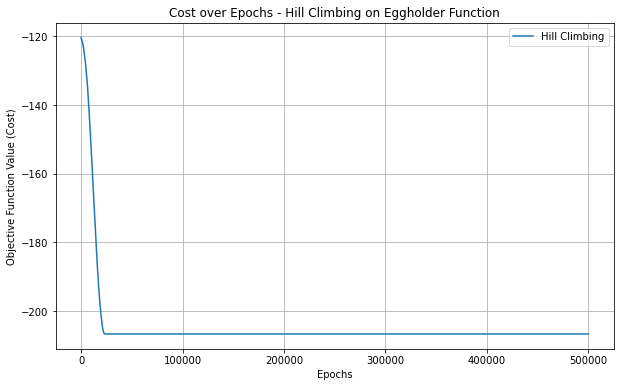

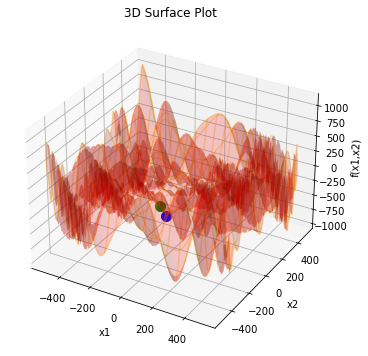

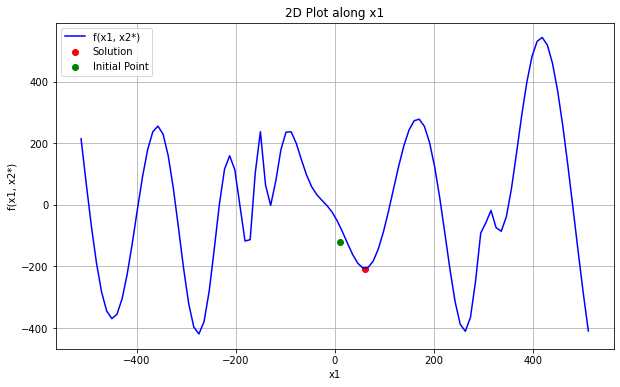

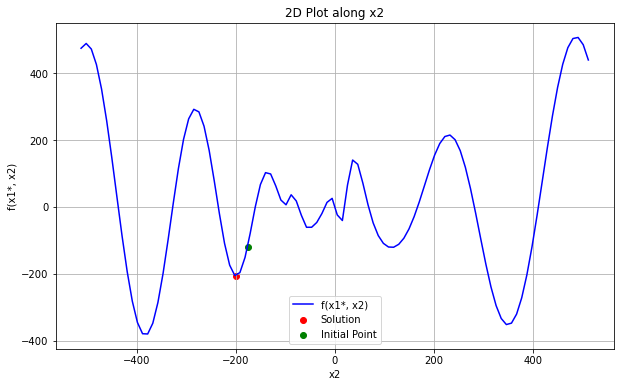

In [115]:
# Create plots for Hill Climbing using Eggholder Function
print("\033[1mPlots for Hill Climbing using Eggholder Function\033[0m\n")
plot_cost_progress(egg_cost_progress_hill, 'Hill Climbing', 'Eggholder Function')
plot_3d_surface(objective_eggholder, egg_best_solution_hill, egg_best_value_hill, egg_initial_point_hill)
plot_2d_x1(objective_eggholder, egg_best_solution_hill, egg_best_value_hill, egg_initial_point_hill)
plot_2d_x2(objective_eggholder, egg_best_solution_hill, egg_best_value_hill, egg_initial_point_hill)

Plots for Simulated Annealing using Eggholder Function



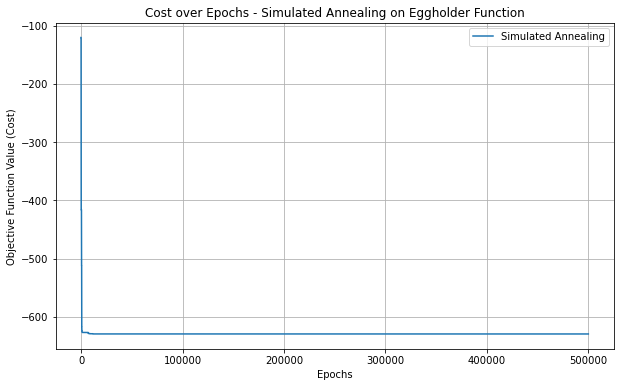

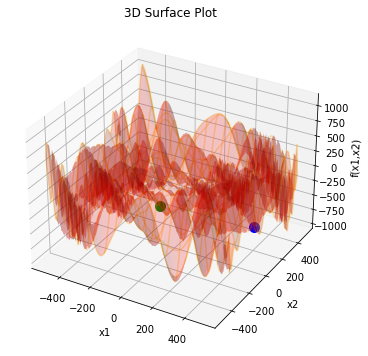

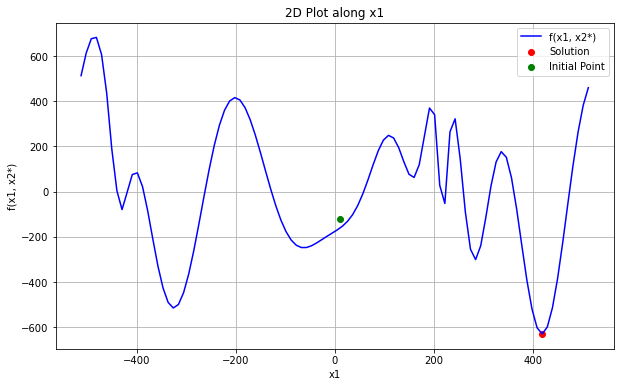

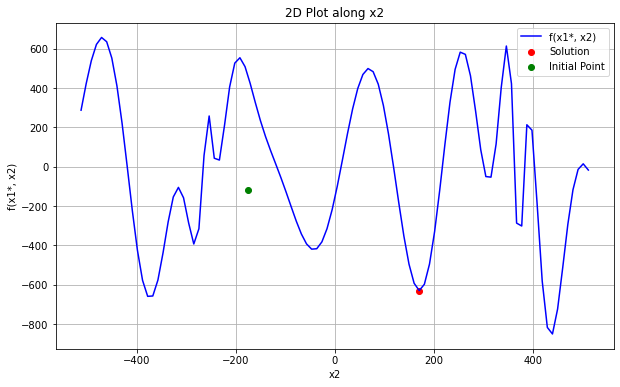

In [116]:
# Create plots for Simulated Annealing using Eggholder Function
print("\033[1mPlots for Simulated Annealing using Eggholder Function\033[0m\n")
plot_cost_progress(egg_cost_progress_siman, 'Simulated Annealing', 'Eggholder Function')
plot_3d_surface(objective_eggholder, egg_best_solution_siman, egg_best_value_siman, egg_initial_point_siman)
plot_2d_x1(objective_eggholder, egg_best_solution_siman, egg_best_value_siman, egg_initial_point_siman)
plot_2d_x2(objective_eggholder, egg_best_solution_siman, egg_best_value_siman,egg_initial_point_siman)

Plots for Hill Climbing using Levi N13 Function



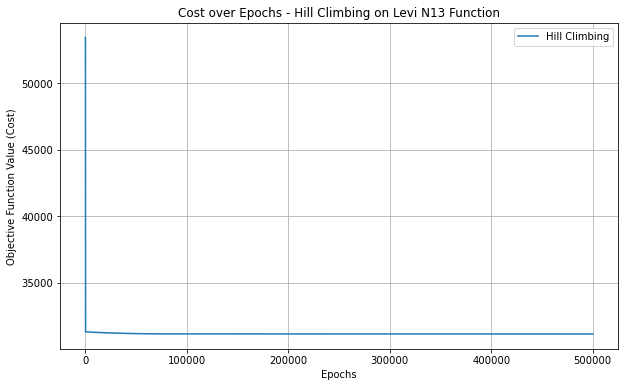

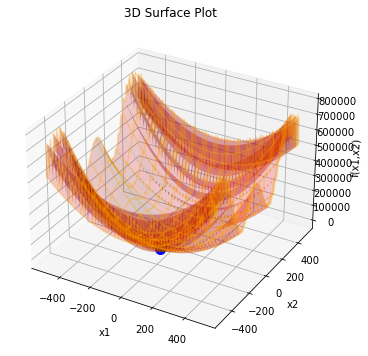

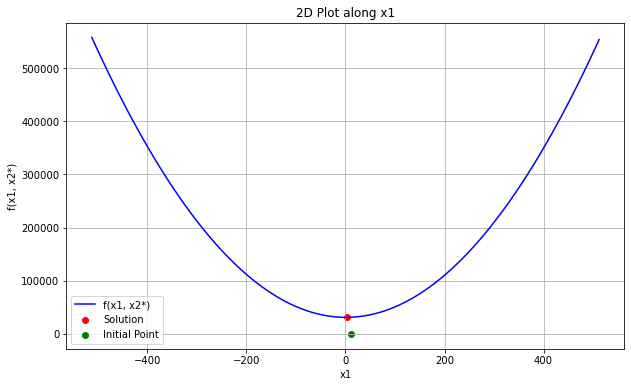

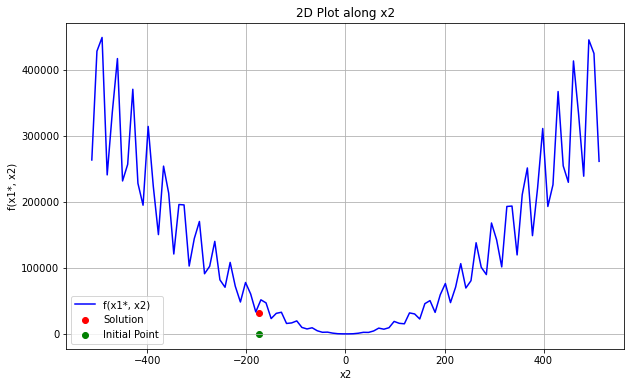

In [117]:
# Create plots for Hill Climbing using Eggholder Function
print("\033[1mPlots for Hill Climbing using Levi N13 Function\033[0m\n")
plot_cost_progress(levin13_cost_progress_hill, 'Hill Climbing', 'Levi N13 Function')
plot_3d_surface(objective_levi_n13, levin13_best_solution_hill, levin13_best_value_hill, levin13_initial_point_hill)
plot_2d_x1(objective_levi_n13, levin13_best_solution_hill, levin13_best_value_hill, egg_initial_point_siman)
plot_2d_x2(objective_levi_n13, levin13_best_solution_hill, levin13_best_value_hill, egg_initial_point_siman)

Plots for Simulated Annealing using Levi N13 Function



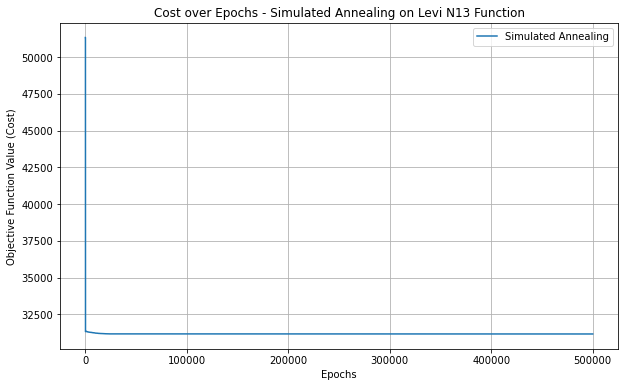

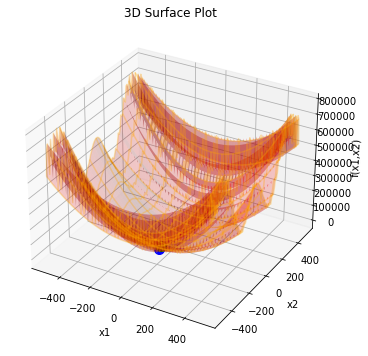

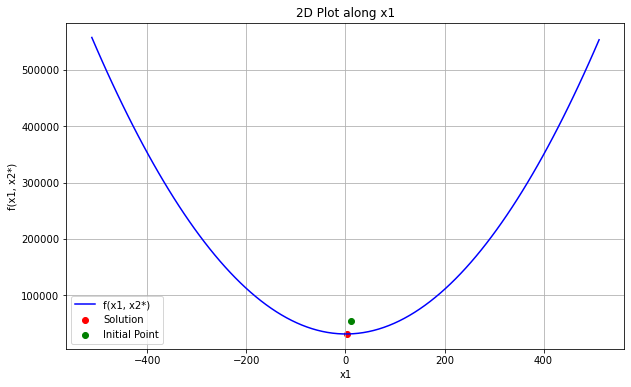

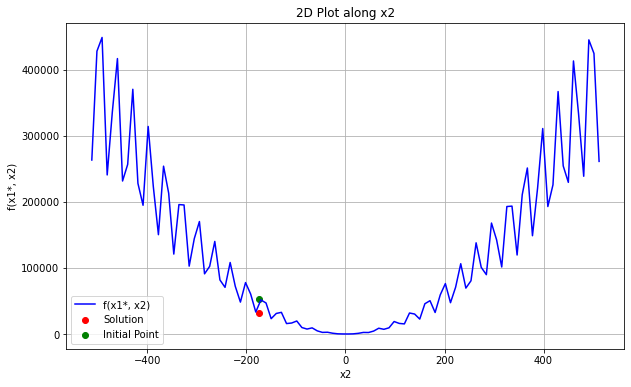

In [118]:
# Create plots for Simulated Annealing using Eggholder Function
print("\033[1mPlots for Simulated Annealing using Levi N13 Function\033[0m\n")
plot_cost_progress(levin13_cost_progress_siman, 'Simulated Annealing', 'Levi N13 Function')
plot_3d_surface(objective_levi_n13, levin13_best_solution_siman, levin13_best_value_siman, levin13_initial_point_siman)
plot_2d_x1(objective_levi_n13, levin13_best_solution_siman, levin13_best_value_siman, levin13_initial_point_siman)
plot_2d_x2(objective_levi_n13, levin13_best_solution_siman, levin13_best_value_siman, levin13_initial_point_siman)

Which algorithms is better? Write observations about algorithm performances, drawbacks, etc...

In [119]:
print("\033[1mEggholderFunction\033[0m\n")
print("Cost Hill Climbing:", egg_best_value_hill)
print("Cost Simulated Annealing:", egg_best_value_siman, "\n")

print("Time Hill Climbing:", execution_time_egg_hill, "seconds")
print("Time Simulated Annealing:", execution_time_egg_siman, "seconds\n")

print("\033[1mLevi N13 Function\033[0m\n")
print("Cost Hill Climbing:", levin13_best_value_hill)
print("Cost Simulated Annealing:", levin13_best_value_siman, "\n")

print("Time Hill Climbing:", execution_time_levin13_hill, "seconds")
print("Time Simulated Annealing:", execution_time_levin13_siman, "seconds")

EggholderFunction

Cost Hill Climbing: -206.69740638837365
Cost Simulated Annealing: -629.621056226869 

Time Hill Climbing: 2.6456429958343506 seconds
Time Simulated Annealing: 2.6883277893066406 seconds

Levi N13 Function

Cost Hill Climbing: 31162.84561437568
Cost Simulated Annealing: 31157.652356378545 

Time Hill Climbing: 2.115312099456787 seconds
Time Simulated Annealing: 2.203104019165039 seconds


**RESULTS:**

**EggholderFunction:**
* Both Hill Climbing and Simulated Annealing found solutions that improved upon the initial value of the objective function.
* Simulated Annealing achieved a lower cost (-629.62) compared to Hill Climbing (-206.697), indicating better optimization performance for this specific problem.
* However, this results strongly depend on the randomly generated starting point of the algorithm. To ensure the ability to compare the results of the algorithms, the same starting point was choosen.
* The execution times for both algorithms are relatively close, with Hill Climbing slightly faster than Simulated Annealing.

**Levi N13 Function:**
* Similar to the EggholderFunction case, both algorithms improved the initial objective function value.
* Simulated Annealing again achieved a lower cost (31157.65) compared to Hill Climbing (31162.845). However, the difference is only small.
* Again, to ensure the ability to compare the results of the algorithms, the same starting point was choosen.
* The execution time for Hill Climbing is slightly faster than Simulated Annealing for this problem.

**Conclusions:**
* Simulated Annealing appears to be more effective in finding lower-cost solutions for both functions
* Execution time difference between the two algorithms is relatively small for the provided functions and is thus not an important evaluation criteria in this case
* Simulated Annealing's ability to explore the solution space more effectively and escape local optima makes it a preferred choice for functions with complex landscapes or multiple optima. Its goal is to find the global minimum in complex search spaces.
* Hill Climbing is suitable for simpler functions or when computational efficiency is a primary concern
* The resulting optimum found by Hill Climbing depends more strongly on random initial point. Thus, results are not very reliable. This is because it starts from a random initial point and explores the nearby solution space by iteratively moving to neighboring points that have better objective function value. When the inital point is located close to a local optimum, this point gets returned with a higehr probability. To the contrary, simulated Annealing employs a probabilistic approach that allows it to escape local optima by accepting worse solutions with a certain probability
* The latter was especially found for the Eggholder Function which is a function in a more complicated space. Thus, the intial point is determining of how well the hill climbing algorithm performs.

**Show the solutions ploted on the function to check if the solution makes sense**
* Yes they make sense. It is very good visible why the algorithm stop where they do. Often it is a local minimum - depending on the algorithm the inital solution changes differently towards the optimized solution due to the reasons already discussed above.

## Task 1b: Using optimisation libraries 

 - Find the minima of the given Eggholder and Levi13 functions using an optimisation library: eg. [Nevergrad](https://facebookresearch.github.io/nevergrad/), [CMA-ES](https://github.com/CyberAgentAILab/cmaes) or [Scikit-opt](https://scikit-opt.github.io/scikit-opt/#/en/README).
 - Compare —and report— the time your optimisation algorithm took to optimise the function vs the one from the external library.

In [124]:
# Using Scikit-op: Genetic Algorithm
# ! pip install scikit-opt
from sko.GA import GA

# Optimze eggholder function
ga_egg = GA(func=objective_eggholder, n_dim=2, max_iter=1000, prob_mut=0.001, lb=[-512, -512], ub=[512, 512], precision=1e-7)

start_time = time.time()

egg_GA_x, egg_GA_y = ga_egg.run()

end_time = time.time()
execution_time_egg_GA = end_time - start_time

print('egg_GA_x:', egg_GA_x, '\n', 'egg_GA_y:', egg_GA_y)

egg_GA_x: [347.32706427 499.41543496] 
 egg_GA_y: [-888.94912527]


In [125]:
# Optimze Levi13 function
ga_levi = GA(func=objective_levi_n13, n_dim=2, max_iter=1000, prob_mut=0.001, lb=[-512, -512], ub=[512, 512], precision=1e-7)

start_time = time.time()

levi_GA_x, levi_GA_y = ga_levi.run()

end_time = time.time()
execution_time_levi13_GA = end_time - start_time

print('levi_GA_x:', levi_GA_x, '\n', 'levi_GA_y:', levi_GA_y)

levi_GA_x: [0.6703805  0.99999997] 
 levi_GA_y: [0.10987366]


In [126]:
print("\033[1mEggholderFunction\033[0m\n")

print("Cost Scikit-opt library (Genetic Algorithm):", egg_GA_y[0]) 
print("Best Cost my algorithm (Simulated Annealing):", egg_best_value_siman, "\n")

print("Time Genetic Algorithm:", execution_time_egg_GA, "seconds")
print("Time Hill Climbing:", execution_time_egg_hill, "seconds")
print("Time Simulated Annealing:", execution_time_egg_siman, "seconds\n")

print("\033[1mLevi N13 Function\033[0m\n")

print("Cost Scikit-opt library (Genetic Algorithm):", levi_GA_y[0]) 
print("Best Cost my algorithm (Simulated Annealing):", levin13_best_value_siman, "\n")

print("Time Genetic Algorithm:", execution_time_levi13_GA, "seconds")
print("Time Hill Climbing:", execution_time_levin13_hill, "seconds")
print("Time Simulated Annealing:", execution_time_levin13_siman, "seconds")

EggholderFunction

Cost Scikit-opt library (Genetic Algorithm): -888.9491252685926
Best Cost my algorithm (Simulated Annealing): -629.621056226869 

Time Genetic Algorithm: 0.519460916519165 seconds
Time Hill Climbing: 2.6456429958343506 seconds
Time Simulated Annealing: 2.6883277893066406 seconds

Levi N13 Function

Cost Scikit-opt library (Genetic Algorithm): 0.10987365835889264
Best Cost my algorithm (Simulated Annealing): 31157.652356378545 

Time Genetic Algorithm: 0.4671661853790283 seconds
Time Hill Climbing: 2.115312099456787 seconds
Time Simulated Annealing: 2.203104019165039 seconds


**RESULTS:**
* In regard to cost, the Genetic Algorithm (GA) from the Scikit-opt library outperformed my two created algorithms for both the Eggholder and LeviN13 Function as it achieves a lower cost.
* The impported algorithm reaches a much lower point and thus gets closer to the global minima, succesfully escaping local minima.
* In regard to time, the recorded time can't be compared as the number of iterations varied a lot. GA did not require so many iterations to achieve a much better result, and is thus prefered.
* In conclusion, for the present functions, the GA from the external library is prefered.

## Task 2: Code an algorithm that will improve the route between the cities

Traveling Salesman Problem is the most famous NP-hard benchmark problem. You get a list of cities that you need to visit and return to the start position. The better route is the one with the shortest cost.

Implement an algorithm that will improve the route on the list of given cities.

### Given Code

In [3]:
# Libs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import random, operator, time, itertools, math
import numpy as np

Some helper functions

In [4]:
def distance(city1, city2): 
    # The Euclidean distance between two cities.
    # city1 and city2 are two dimensional vectors representing coordinates
    return np.linalg.norm(city1-city2)

def total_distance(city_list, tour): # city list = list of coordinate of cities, tour = list of indeces in which order we visit the cities
    # The total distance between each pair of consecutive cities in the tour.
    # This is your objective function
    return sum(distance(city_list[tour[i]], city_list[tour[i-1]]) 
               for i in range(len(city_list)))

c1 = np.array([0.0, 300.0]) # two example cities
c2 = np.array([400.0, 0.0])
distance(c1, c2)

500.0

In [5]:
def generate_random_problem(num_cities=15):
  return [((np.random.rand(1,2) + 1) * 200) for _ in range(num_cities)]

def generate_predefined_problem():
  p = [np.array([[370, 260]]),
   np.array([[355, 378]]),
   np.array([[307, 369]]),
   np.array([[302, 399]]),
   np.array([[238, 265]]),
   np.array([[215, 333]]),
   np.array([[304, 282]]),
   np.array([[277, 207]]),
   np.array([[227, 323]]),
   np.array([[394, 314]]),
   np.array([[220, 226]]),
   np.array([[321, 333]]),
   np.array([[363, 252]]),
   np.array([[272, 257]]),
   np.array([[397, 341]])]
  return p

city_list = generate_predefined_problem()

In [6]:
# An individual is a permutation of the indexes representing the cities in the
# `problem` list of cities

solution_1 = random.sample(list(range(len(city_list))), k=len(city_list))
print(solution_1)
total_distance(city_list, solution_1)

[10, 14, 11, 5, 4, 7, 1, 8, 13, 12, 0, 3, 2, 6, 9]


1606.8035190806613

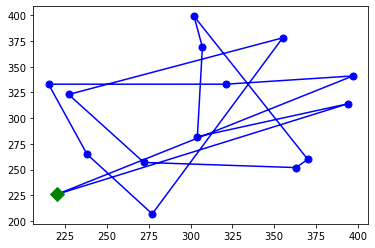

In [7]:
# Code for plotting
def plot_tour(city_list, solution, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    tour = [city_list[idx] for idx in solution]
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    plt.show()

def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = xy_separate(points)

    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)

def xy_separate(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    # print(points)
    return [p[0][0] for p in points], [p[0][1] for p in points]

plot_tour(city_list, solution_1)

### Definition of Problems

In [8]:
# First problem: Creation of the predefined city list listing theire coordinates & a list of randomly created tour
prob1_city_list = generate_predefined_problem()

prob1_tour = random.sample(list(range(len(prob1_city_list))), k=len(prob1_city_list))
prob1_distance = total_distance(prob1_city_list, prob1_tour)

print("\033[1mFirst problem (predefined coordinates & random tour)\033[0m")
print("Original List of Tour:", prob1_tour)
print("Original total distance:",prob1_distance )

First problem (predefined coordinates & random tour)
Original List of Tour: [13, 9, 2, 3, 6, 5, 14, 8, 1, 11, 10, 12, 0, 7, 4]
Original total distance: 1551.4135343034823


In [9]:
# Second problem: Creation of the predefined city list listing theire coordinates & a predefined list of the tour by keeping the original order of the predefined cities
prob2_tour = list(range(15))
# city list is the same as for problem 1
prob2_distance = total_distance(prob1_city_list, prob2_tour)

print("\033[1mSecond problem (predefined coordinates & tour)\033[0m")
print("Original list of Tour:", prob2_tour)
print("Original total distance:",prob2_distance )

Second problem (predefined coordinates & tour)
Original list of Tour: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Original total distance: 1654.8204712953175


In [10]:
# Third problem: Creation of a random city list including random coordinates & a list of randomly created tour
prob3_city_list = generate_random_problem()
prob3_tour = random.sample(list(range(len(prob3_city_list))), k=len(prob3_city_list))

prob3_distance = total_distance(prob3_city_list, prob3_tour)

print("\033[1mThird problem (random coordinates & tour)\033[0m")
print("Original List of Tour:", prob3_tour)
print("Original total distance:",prob3_distance )

Third problem (random coordinates & tour)
Original List of Tour: [2, 10, 5, 4, 9, 7, 8, 3, 14, 12, 6, 1, 13, 11, 0]
Original total distance: 1785.4106647795381


### Implementation of optimization algorithm

#### Hill Climbing

In [11]:
def hill_climbing_TSP(city_list, initial_tour, max_iterations=500):
    
    current_tour = initial_tour.copy()
    current_cost = total_distance(city_list, current_tour)
    cost_progress = [current_cost]  # Track the cost progress
    iterations = 0
    
    while iterations < max_iterations:
        neighbors = []
        for i in range(len(city_list)):
            for j in range(i + 1, len(city_list)):
                neighbor = current_tour.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                neighbors.append(neighbor)
        
        best_neighbor = min(neighbors, key=lambda tour: total_distance(city_list, tour))
        best_neighbor_cost = total_distance(city_list, best_neighbor)
        
        if best_neighbor_cost < current_cost:
            current_tour = best_neighbor
            current_cost = best_neighbor_cost
            cost_progress.append(current_cost)
        else:
            cost_progress.append(best_neighbor_cost)# Add current cost to progress list
        
        iterations += 1
    
    return current_tour, current_cost, cost_progress


In [12]:
prob1_tour_optimized, prob1_distance_optimized, prob1_distance_progress =  hill_climbing_TSP(prob1_city_list, prob1_tour)
prob2_tour_optimized, prob2_distance_optimized, prob2_distance_progress =  hill_climbing_TSP(prob1_city_list, prob2_tour)
prob3_tour_optimized, prob3_distance_optimized, prob3_distance_progress =  hill_climbing_TSP(prob3_city_list, prob3_tour)

print("\033[1mFirst problem (predefined coordinates & random tour)\033[0m")
print("Optimized List of Tour:", prob1_tour_optimized)
print("Optimized total distance from", prob1_distance, "to",prob1_distance_optimized )


print("\033[1mSecond problem (predefined coordinates & tour)\033[0m")
print("Optimized List of Tour:", prob2_tour_optimized)
print("Optimized total distance from", prob2_distance, "to",prob2_distance_optimized )


print("\033[1mThird problem (random coordinates & tour)\033[0m")
print("Optimized List of Tour:", prob3_tour_optimized)
print("Optimized total distance from", prob3_distance, "to",prob3_distance_optimized )

First problem (predefined coordinates & random tour)
Optimized List of Tour: [13, 6, 8, 5, 11, 2, 3, 1, 14, 9, 0, 12, 7, 10, 4]
Optimized total distance from 1551.4135343034823 to 763.402423049774
Second problem (predefined coordinates & tour)
Optimized List of Tour: [1, 3, 2, 11, 5, 8, 4, 10, 7, 13, 6, 12, 0, 9, 14]
Optimized total distance from 1654.8204712953175 to 719.6491643976669
Third problem (random coordinates & tour)
Optimized List of Tour: [7, 14, 3, 9, 11, 5, 8, 0, 13, 1, 10, 12, 4, 6, 2]
Optimized total distance from 1785.4106647795381 to 831.2094791189977


#### Simulated Annealing

In [13]:
def simulated_annealing_TSP(city_list, initial_tour, max_iterations=10000, initial_temperature=100, cooling_rate=0.999):
    
    current_tour = initial_tour.copy()
    current_cost = total_distance(city_list, current_tour)
    
    cost_progress = [current_cost]  # Track the cost progress
    
    iterations = 0
    
    temperature = initial_temperature
    
    while iterations < max_iterations and temperature > 1e-6:  # Temperature lower bound
        i, j = np.random.choice(len(city_list), size=2, replace=False)  # Choose two random cities
        
        neighbor = current_tour.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        neighbor_cost = total_distance(city_list, neighbor)
        
        delta_cost = neighbor_cost - current_cost
        
        if delta_cost < 0 or np.random.rand() < np.exp(-delta_cost / temperature):
            current_tour = neighbor
            current_cost = neighbor_cost
            cost_progress.append(current_cost)
        
        temperature *= cooling_rate
        iterations += 1
    
    return current_tour, current_cost, cost_progress


In [16]:
prob1_tour_optimized_siman, prob1_distance_optimized_siman, prob1_distance_progress_siman =  simulated_annealing_TSP(prob1_city_list, prob1_tour, max_iterations=200000, initial_temperature=100, cooling_rate=0.995)
prob2_tour_optimized_siman, prob2_distance_optimized_siman, prob2_distance_progress_siman =  simulated_annealing_TSP(prob1_city_list, prob2_tour, max_iterations=200000, initial_temperature=100,cooling_rate=0.995)
prob3_tour_optimized_siman, prob3_distance_optimized_siman, prob3_distance_progress_siman =  simulated_annealing_TSP(prob3_city_list, prob3_tour, max_iterations=200000, initial_temperature=100, cooling_rate=0.995)

print("\033[1mFirst problem (predefined coordinates & random tour)\033[0m")
print("Optimized List of Tour:", prob1_tour_optimized_siman)
print("Optimized total distance from", prob1_distance, "to",prob1_distance_optimized_siman, "(compared to hill climbing:", prob1_distance_optimized, ")")


print("\033[1mSecond problem (predefined coordinates & tour)\033[0m")
print("Optimized List of Tour:", prob2_tour_optimized)
print("Optimized total distance from", prob2_distance, "to",prob2_distance_optimized_siman, "(compared to hill climbing:", prob2_distance_optimized, ")")

print("\033[1mThird problem (random coordinates & tour)\033[0m")
print("Optimized List of Tour:", prob3_tour_optimized)
print("Optimized total distance from", prob3_distance, "to", prob3_distance_optimized_siman, "(compared to hill climbing:", prob3_distance_optimized, ")")

First problem (predefined coordinates & random tour)
Optimized List of Tour: [0, 9, 14, 1, 3, 2, 11, 5, 8, 4, 10, 7, 13, 6, 12]
Optimized total distance from 1551.4135343034823 to 719.6491643976669 (compared to hill climbing: 763.402423049774 )
Second problem (predefined coordinates & tour)
Optimized List of Tour: [1, 3, 2, 11, 5, 8, 4, 10, 7, 13, 6, 12, 0, 9, 14]
Optimized total distance from 1654.8204712953175 to 719.649164397667 (compared to hill climbing: 719.6491643976669 )
Third problem (random coordinates & tour)
Optimized List of Tour: [7, 14, 3, 9, 11, 5, 8, 0, 13, 1, 10, 12, 4, 6, 2]
Optimized total distance from 1785.4106647795381 to 793.4693716542337 (compared to hill climbing: 831.2094791189977 )


### Plotting

In [24]:
# Creation of a function that returns plots of interests in a joint way
def plot_results(city_list, tour_input, cost_input, tour_output, cost_output, cost_progress, optimizer_name = "Hill Climbing", alpha=1, color=None):
    
    print("Original Tour")
    print("Distance of tour:", cost_input)
    plot_tour(city_list, tour_input, alpha=alpha, color=color)
    plt.show()
    
    print("Optimized Tour")
    print("Distance of tour:", cost_output)
    plot_tour(city_list, tour_output, alpha=alpha, color=color)
    plt.show()
    
    # Plotting the cost progress
    plot_cost_progress(cost_progress, optimizer_name, "Travelling Salesman Problem")
    plt.show()

#### Hill Climbing

First problem (predefined coordinates & random tour)
Original Tour
Distance of tour: 1551.4135343034823


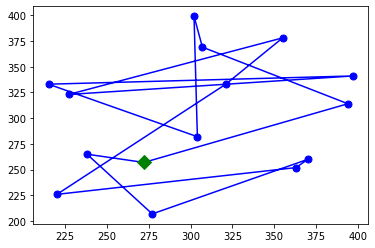

Optimized Tour
Distance of tour: 763.402423049774


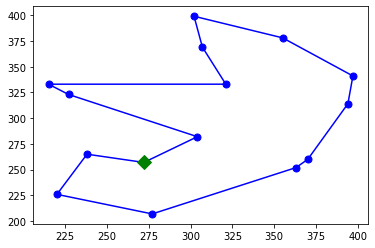

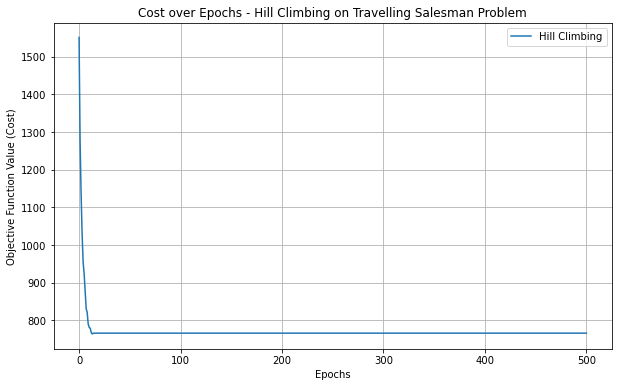

In [25]:
print("\033[1mFirst problem (predefined coordinates & random tour)\033[0m")
plot_results(prob1_city_list, prob1_tour, prob1_distance, prob1_tour_optimized, prob1_distance_optimized, prob1_distance_progress)

Second problem (predefined coordinates & tour)
Original Tour
Distance of tour: 1654.8204712953175


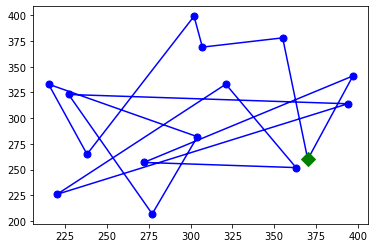

Optimized Tour
Distance of tour: 719.6491643976669


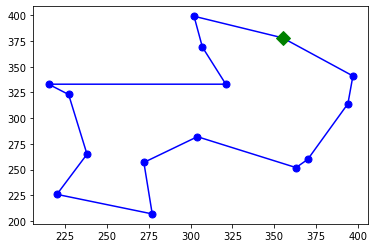

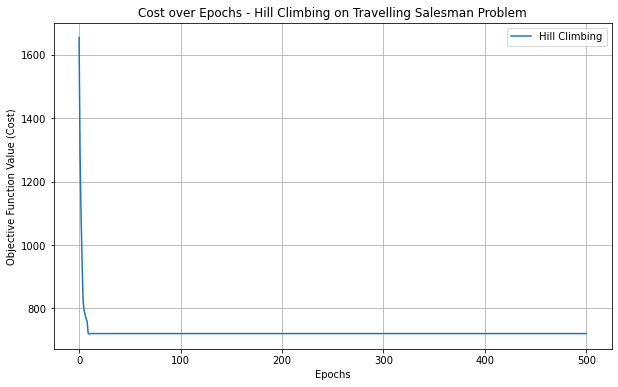

In [19]:
print("\033[1mSecond problem (predefined coordinates & tour)\033[0m")
plot_results(prob1_city_list, prob2_tour, prob2_distance, prob2_tour_optimized, prob2_distance_optimized, prob2_distance_progress)

Third problem (random coordinates & tour)
Original Tour
Distance of tour: 1785.4106647795381


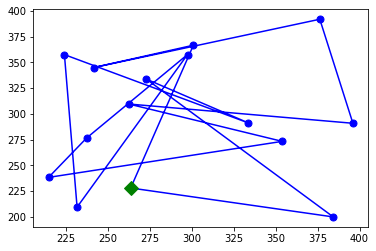

Optimized Tour
Distance of tour: 831.2094791189977


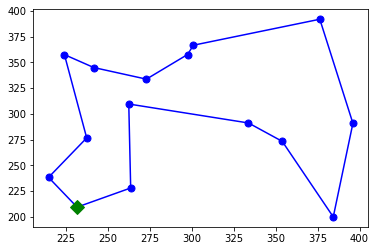

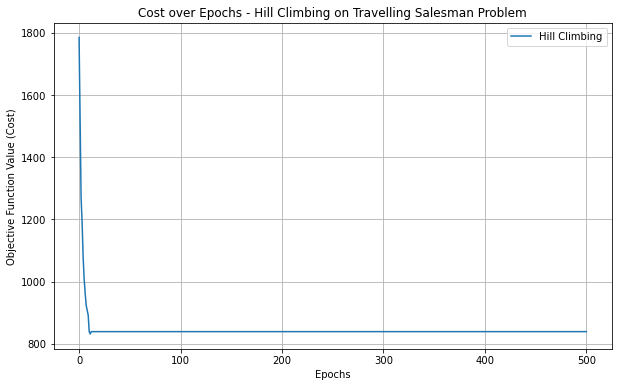

In [20]:
print("\033[1mThird problem (random coordinates & tour)\033[0m")
plot_results(prob3_city_list, prob3_tour, prob3_distance, prob3_tour_optimized, prob3_distance_optimized, prob3_distance_progress)

#### Simulated Annealing

First problem (predefined coordinates & random tour)
Original Tour
Distance of tour: 1551.4135343034823


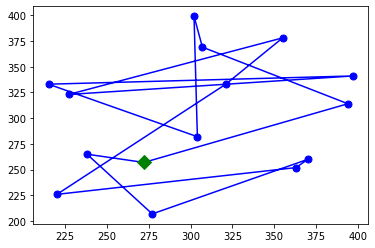

Optimized Tour
Distance of tour: 719.6491643976669


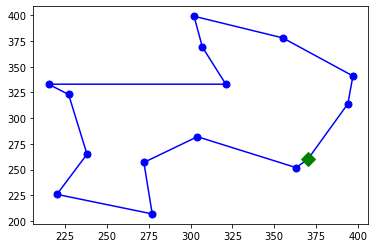

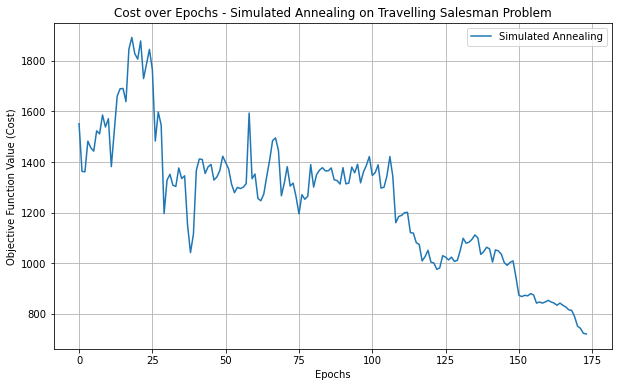

In [26]:
print("\033[1mFirst problem (predefined coordinates & random tour)\033[0m")
plot_results(prob1_city_list, prob1_tour, prob1_distance, prob1_tour_optimized_siman, prob1_distance_optimized_siman, prob1_distance_progress_siman, optimizer_name = "Simulated Annealing")

Second problem (predefined coordinates & tour)
Original Tour
Distance of tour: 1654.8204712953175


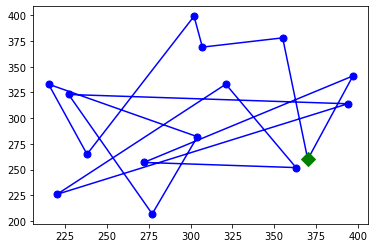

Optimized Tour
Distance of tour: 719.649164397667


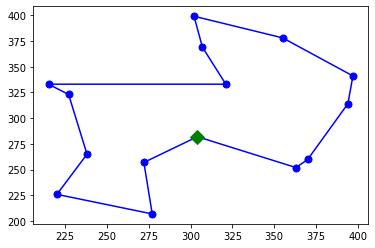

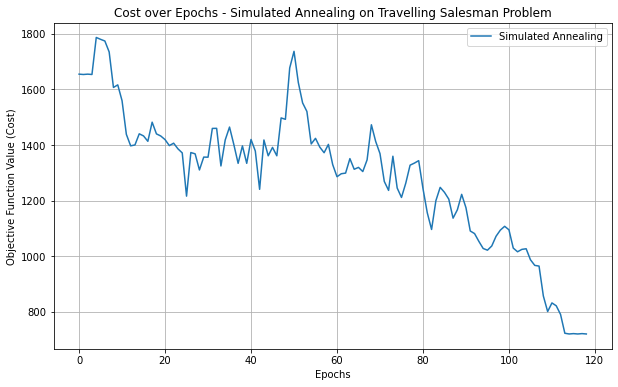

In [27]:
print("\033[1mSecond problem (predefined coordinates & tour)\033[0m")
plot_results(prob1_city_list, prob2_tour, prob2_distance, prob2_tour_optimized_siman, prob2_distance_optimized_siman, prob2_distance_progress_siman, optimizer_name = "Simulated Annealing")

Third problem (random coordinates & tour)
Original Tour
Distance of tour: 1785.4106647795381


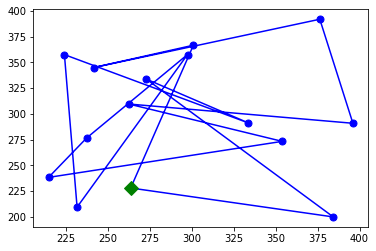

Optimized Tour
Distance of tour: 793.4693716542337


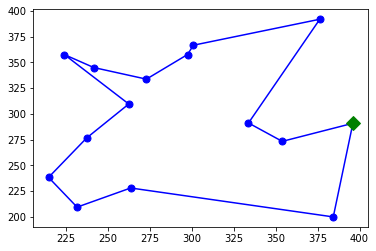

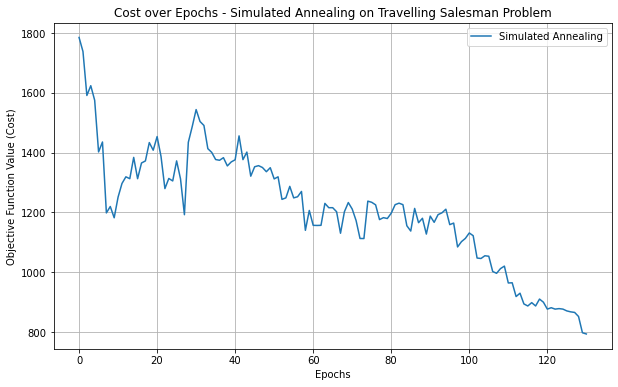

In [28]:
print("\033[1mThird problem (random coordinates & tour)\033[0m")
plot_results(prob3_city_list, prob3_tour, prob3_distance, prob3_tour_optimized_siman, prob3_distance_optimized_siman, prob3_distance_progress_siman, optimizer_name = "Simulated Annealing")

### Analysis of Results

In [29]:
print("\033[1mFirst problem (predefined coordinates & random tour)\033[0m")
print("Original distance:", prob1_distance, "Hill Climbing optimized distance", prob1_distance_optimized, "Simulated Annealing distance", prob1_distance_optimized_siman)

print("\033[1mSecond problem (predefined coordinates & tour)\033[0m")
print("Original distance:", prob2_distance, "Hill Climbing optimized distance", prob2_distance_optimized, "Simulated Annealing distance", prob2_distance_optimized_siman)

print("\033[1mThird problem (random coordinates & tour)\033[0m")
print("Original distance:", prob3_distance, "Hill Climbing optimized distance", prob3_distance_optimized, "Simulated Annealing distance", prob3_distance_optimized_siman)

First problem (predefined coordinates & random tour)
Original distance: 1551.4135343034823 Hill Climbing optimized distance 763.402423049774 Simulated Annealing distance 719.6491643976669
Second problem (predefined coordinates & tour)
Original distance: 1654.8204712953175 Hill Climbing optimized distance 719.6491643976669 Simulated Annealing distance 719.649164397667
Third problem (random coordinates & tour)
Original distance: 1785.4106647795381 Hill Climbing optimized distance 831.2094791189977 Simulated Annealing distance 793.4693716542337


**FINDINGS**
1. **Show if the solution improved over time**
* Yes it did.
* For Hill climbing: The solution improved especially in the early iterations. Explanation: Since hill climbing always selects the best neighbor, it tends to make continuous improvements in the early iterations because it consistently chooses better solutions. However, it can get stuck in local optima if it cannot find a better neighbor
* For Simulated Annealing: It behavios very different. While it overall decreases, it is very bumpy in the beginning and in later iterations it decrease much more constant. Explanation: The probability of accepting worse solutions decreases over time (iterations) as the temperature decreases. This makes it possible to explore a broader solution space, which can help it escape local optima and find global optima. The initial high temperature encourages exploration, leading to "bumpiness" observable in the graph as the algorithm explores different solutions. As the temperature decreases, the algorithm becomes more selective, eventually converging towards an optimal solution. 

* The decrease of the total distance reduced more in the random problem which could be explained by the random generation of the city coordinates. This might create numbers that are very distinct.
* Also, the distance of the optimized random city problem is larger (831.209) then the results for the other predefined problem.

2. **Plot the optimized solution. Is there any visible improvements over the random one? Do some transitions make more sense in the optimized solution?**
* The improvements are clearly visible. For all problems, the connections result in a kind of circle connecting the cities in a logic way. There are no crossing lines which would indicate large distances (like a ping pong).
* For Hill Climbing: the found optimized tour is slightly different depending on the initial tour. (see explanation under 3.)
* When running the optimization algorithm multiple times, the plots can differ slightly. Though, crossing lines are very rare, the path can change slighly. Probably, this is the result because there are different optimal routes that only have slight distance differnces. Maybe more iterations could solve this.

3. **Comparison of different optimizers**
* The first two problems had the same coordinates but a different intial tour. It can be seen that with the hill climbing algorithm, the optimized cost differed depending on the tour (starting point). While the second tour results by optimization to the same point as Simulated Annealing, the first tour does not. When using Simulated Annealing there was (almost) no differnce in the result. This supports that the latter algorithm escapes local minima much better and does not depend so strongly on the intial tour. Also, the plots confirm this when comparing the tours created by both optimizers.